**Name:** Ronmi Eyitayo Akanmode  |  **Notebook Description:** Exploratory Data Analysis of Airbnb listings in London, UK.  |  <a href="http://data.insideairbnb.com/united-kingdom/england/london/2023-09-06/visualisations/listings.csv">Data Source Here</a>

**Importing Relevant Libraries | Loading Dataset | Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns


#loading dataset
data = pd.read_csv ("listings.csv")

# data preprocessing
# dropping columns neighbourhood_group and license because they are filled with nan values
data.drop(['neighbourhood_group', 'license'], axis = 1, inplace = True)

# dropping any other rows with nan values
data = data.dropna(how = 'any')
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,13913.0,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,Islington,51.56861,-0.11270,Private room,79,1,41,11/12/2022,0.26,2,360,11
1,15400.0,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,Kensington and Chelsea,51.48780,-0.16813,Entire home/apt,150,7,94,01/05/2023,0.56,1,73,5
2,92644.0,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,Wandsworth,51.44201,-0.18739,Private room,42,2,216,29/10/2022,1.45,1,217,9
3,17402.0,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,Westminster,51.52195,-0.14094,Entire home/apt,476,3,54,19/11/2022,0.36,9,300,4
4,93015.0,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,Hammersmith and Fulham,51.49993,-0.21707,Entire home/apt,175,5,38,30/09/2022,0.27,1,40,2


**EDA: 10 Insights We Can Derive From the Dataset**

Average Prices: room_type
Entire home/apt    207.229366
Hotel room         254.369565
Private room        82.731089
Shared room        108.864000
Name: price, dtype: float64


---

Most Expensive Listing:
id                                                      38452677.0
name             Guesthouse in Dagenham · ★5.0 · 1 bedroom · 1 ...
neighbourhood                                 Barking and Dagenham
price                                                        80100
Name: 36110, dtype: object

Least Expensive Listing:
id                                                      39366016.0
name             Rental unit in Greater London · ★4.67 · 1 bedr...
neighbourhood                                        Tower Hamlets
price                                                            0
Name: 36863, dtype: object


---

Average Minimum Nights Stay: 5.02


---

Host with the Highest Number of Listings:
James    479
Name: host_name, dtype: int64


---

Neighborhood with the Highest Average Price: Barking and Dagenham
Highest Average Price: 301.88


---

Percentage of Days Listings are Available: 32.62%


---

Average Reviews per Month for Each Room Type:
room_type
Entire home/apt    0.955141
Hotel room         0.573587
Private room       1.121892
Shared room        1.090360
Name: reviews_per_month, dtype: float64


---

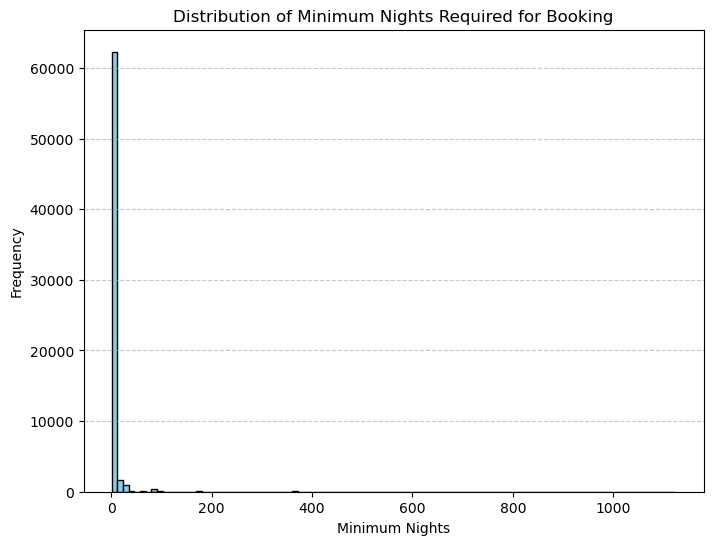

---

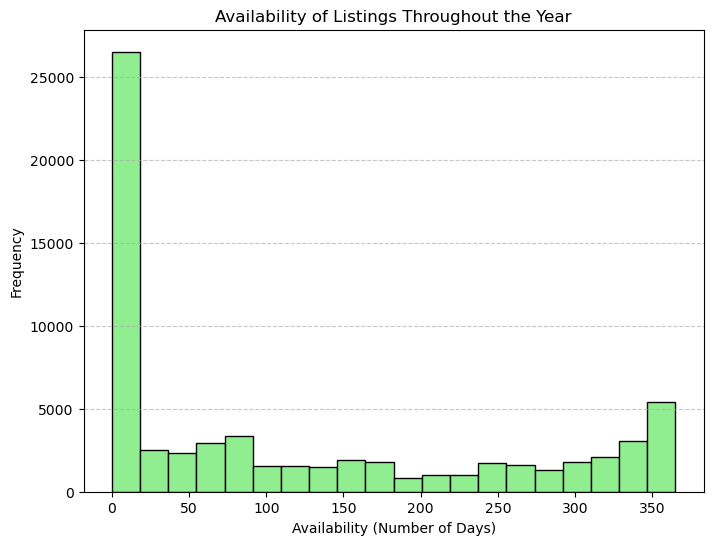

---

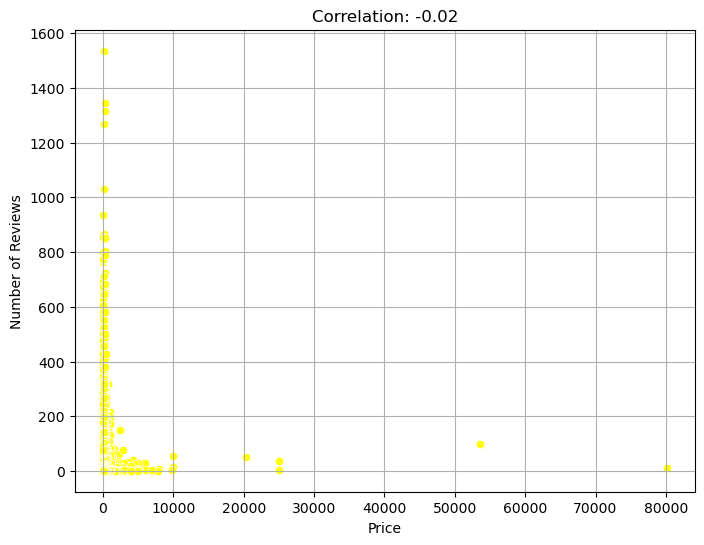

In [2]:
# 1. Average Prices by Room Type:
average_price_by_room_type = data.groupby('room_type')['price'].mean()
print("Average Prices:", average_price_by_room_type)

display(Markdown('---'))

# 2. Most Expensive and Least Expensive Listings:
most_expensive_listing = data.loc[data['price'].idxmax()]
least_expensive_listing = data.loc[data['price'].idxmin()]

print("Most Expensive Listing:")
print(most_expensive_listing[['id', 'name', 'neighbourhood', 'price']])

print("\nLeast Expensive Listing:")
print(least_expensive_listing[['id', 'name', 'neighbourhood', 'price']])

display(Markdown('---'))

# 3. Average Minimum Nights Stay
average_minimum_nights = data['minimum_nights'].mean()
print(f"Average Minimum Nights Stay: {average_minimum_nights:.2f}")

display(Markdown('---'))

# 4. Hosts with the Most Listings:
host_listings_count = data['host_name'].value_counts()
hosts_with_highest_listings = host_listings_count[host_listings_count == host_listings_count.max()]

print("Host with the Highest Number of Listings:")
print(hosts_with_highest_listings)

display(Markdown('---'))

# 5. Neighborhood with Highest Average Price:
average_price_by_neighborhood = data.groupby('neighbourhood')['price'].mean()
neighborhood_highest_average = average_price_by_neighborhood.idxmax()
highest_average_price = average_price_by_neighborhood.max()

print(f"Neighborhood with the Highest Average Price: {neighborhood_highest_average}")
print(f"Highest Average Price: {highest_average_price:.2f}")

display(Markdown('---'))

# 6. Overall Availability Rate
total_days = len(data) * 365  # Assuming a year with 365 days
available_days = data['availability_365'].sum()

# Percentage of days available
percentage_available = (available_days / total_days) * 100

print(f"Percentage of Days Listings are Available: {percentage_available:.2f}%")

display(Markdown('---'))

# 7. Average Reviews per Month by Room Type
average_reviews_per_month_by_room_type = data.groupby('room_type')['reviews_per_month'].mean()

print("Average Reviews per Month for Each Room Type:")
print(average_reviews_per_month_by_room_type)

display(Markdown('---'))

# 8. Distribution of Minimum Nights Stay:
plt.figure(figsize=(8, 6))
plt.hist(data['minimum_nights'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Minimum Nights Required for Booking')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(Markdown('---'))

# 9. Seasonal Availability Trends:
plt.figure(figsize=(8, 6))
plt.hist(data['availability_365'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Availability of Listings Throughout the Year')
plt.xlabel('Availability (Number of Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

display(Markdown('---'))

# 10. Correlation between Price and Reviews:
correlation = data['price'].corr(data['number_of_reviews'])

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=data, color='yellow')

# Customize the plot
plt.title(f'Correlation: {correlation:.2f}')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)

plt.show()